# Neural Network

In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# your model will take the current word and previous tag
# here, we are concatenating X1 and X2, you will need to embed them separately

# generate some random X and Y date
X1 = torch.randn(1000, 50)
X2 = torch.randn(1000, 50) + 1.5
X = torch.cat([X1, X2], dim=0)

Y1 = torch.zeros(1000, 1)
Y2 = torch.ones(1000, 1)
Y = torch.cat([Y1, Y2], dim=0)
print(X.size())
print(Y.size())

torch.Size([2000, 50])
torch.Size([2000, 1])


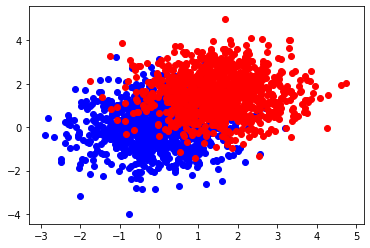

In [12]:
# plot the data to see the distribution
plt.scatter(X1[:, 0], X1[:, 1], color='b')
plt.scatter(X2[:, 0], X2[:, 1], color='r')

In [13]:
# create a class to define our Neural Net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # define all the layers, parameters, etc.
        self.fc1 = nn.Linear(50, 10)
        self.act1 = nn.Sigmoid()
        self.fc2 = nn.Linear(10, 1)
        self.act2 = nn.Sigmoid()
        
    def forward(self, input_):
        # your model will have two inputs: the current word and the previous tag
        # For the option of training your own embedding, 
        # you will need to embed the word and the tag using an embedding layer for each
        # look into nn.Embedding for how to do this
        # you can then concatenate them and feed them through the rest of the network to predict the current tag
        a1 = self.fc1(input_)
        h1 = self.act1(a1)
        a2 = self.fc2(h1)
        y = self.act2(a2)
        return y

In [14]:
net = Net()
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

In [15]:
# function to train the model and keep track of the losses
def train_epoch(model, opt, criterion, batch_size=50):
    model.train()
    losses = []
    for beg_i in range(0, X.size(0), batch_size):
        x_batch = X[beg_i:beg_i + batch_size, :]
        y_batch = Y[beg_i:beg_i + batch_size, :]
        x_batch = Variable(x_batch)
        y_batch = Variable(y_batch)

        opt.zero_grad()
        # (1) Forward
        y_hat = net(x_batch)
        # (2) Compute diff
        loss = criterion(y_hat, y_batch)
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        opt.step() 
        losses.append(loss.data.numpy())
    return [sum(losses)/float(len(losses))]

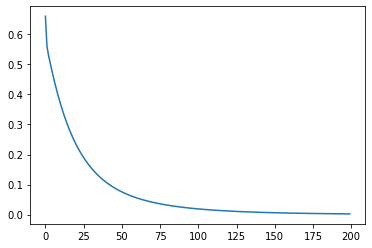

In [16]:
# plot the losses to see that the model is learning
e_losses = []
num_epochs = 200
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion)
plt.plot(e_losses)

In [ ]:
# in your homework, you will also have to experiment with Word2Vec and Bi-LSTM text representations

# here is a tutorial for Bi-LSTM with a CRF. Note 
# https://pytorch.org/tutorials/beginner/nlp/advanced_tutorial.html